In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

C:\Users\gouta\AppData\Local\Temp\ipykernel_14136\3364112674.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID', axis=1, inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# Checking for Null values

In [7]:
df.shape

(7043, 20)

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- it seems out dataset has no null values

# Investigating the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- Here we can see that the ***TotalCharges*** feature is object but it should've been a int or float data type.

In [10]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- now we can see that there are some ***NaN*** values present but there are **11 rows** only so we would drop those rows.

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(categorical_columns)
print(numerical_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [15]:
print(len(categorical_columns))
print(len(numerical_columns))

16
4


- we have **17 categorical** and **3 numerical** columns in our dataset

# Observing numerical columns

In [16]:
numerical_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- ***let's study each of our numerical features***

In [18]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [19]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

- People will high tenure are less likely to leave the compant due to various reasons so let's check the ***tenure*** feature with respect to ***Churn***.

<Axes: xlabel='tenure', ylabel='Churn'>

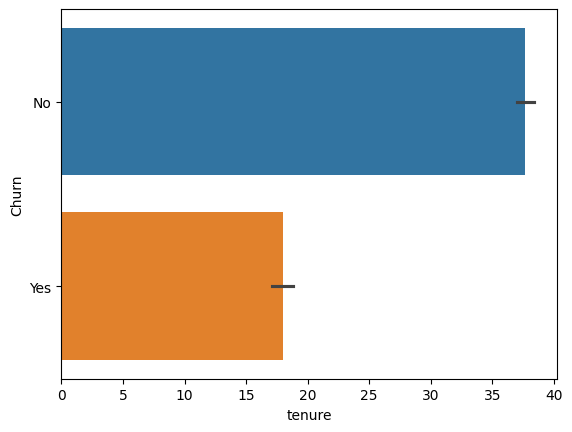

In [20]:
sns.barplot(x='tenure', y='Churn', hue='Churn', data=df)

Here we can see that the customers with ***higher tenure*** are **less likely to leave the company** and customers with tenure ***less than 15*** are **more likely to leave the company**.

- lets plot the same graph with other numerical features

Text(0.5, 1.0, 'Total Charges and Churn')

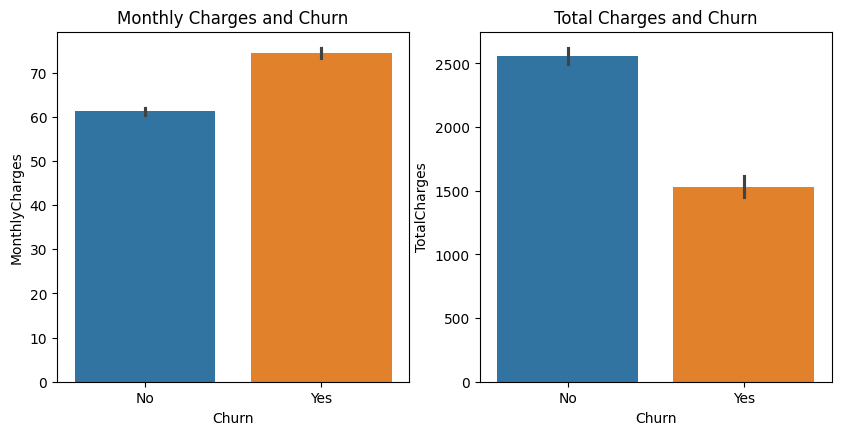

In [21]:
matplotlib.rcParams["figure.figsize"] = (10,10)
plt.subplot(2,2,1)
sns.barplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges and Churn')
plt.subplot(2,2,2)
sns.barplot(x='Churn', y='TotalCharges', hue='Churn', data=df)
plt.title('Total Charges and Churn')

- **This is some interesting results**

- Let's check the ***TotalCharges*** features more 

In [22]:
high_paying_customer = df[df.TotalCharges >= 2283.300441]   ### These customers pay more than the mean TotalCharges

In [23]:
len(high_paying_customer)

2644

In [24]:
len(high_paying_customer[high_paying_customer.tenure > 33 ])  

2376

- now we can say that the **high paying customers are old customers** for the company and if the ***TotalCharges*** for a customer is above the mean ***2284*** it indicates that the customer has been with the company for more than ***33 months*** and these customers are very less likely to churn. 

In [25]:
df.SeniorCitizen.value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [26]:
len(df[(df.SeniorCitizen == 1) & (df.Churn == 'Yes')])  ### SeniorCitizens that churn 

476

In [27]:
len(df[(df.SeniorCitizen == 1) & (df.Churn == 'No')])

666

In [28]:
476/1142

0.4168126094570928

In [29]:
len(df[(df.SeniorCitizen == 0) & (df.Churn == 'Yes')])

1393

In [30]:
len(df[(df.SeniorCitizen == 0) & (df.Churn == 'No')])

4497

In [31]:
1393/5890

0.2365025466893039

# Analysis results from numerical features

- SeniorCitizens have a **41.68%** chance to churn in comparison to **23.65%** of non SeniorCitizens.
- Higher ***MonthlyCharges*** (above mean 64.798208) can lead to customer churn.
- Higher ***TotalCharges*** mean the high ***tenure*** that is the customer is a old customer and less likely to leave the company.

# Let's visit the categorical column now 

In [32]:
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [33]:
df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [34]:
len(df[(df.gender == 'Male') & (df.Churn == 'Yes')])

930

In [35]:
len(df[(df.gender == 'Female') & (df.Churn == 'Yes')])

939

- Men and women both are equally likely to churn 

In [36]:
df.Dependents.value_counts()

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

In [37]:
df[df.Dependents == 'Yes'].Churn.value_counts()

Churn
No     1773
Yes     326
Name: count, dtype: int64

- From here we can the ***Dependents*** feature is not very contributing to customer churn there are total 2099 values and only 326 are churned giving the **15.53%** chance.

In [38]:
df.Partner.value_counts()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

In [39]:
df[df.Partner == 'Yes'].Churn.value_counts()

Churn
No     2724
Yes     669
Name: count, dtype: int64

- Now let's base this information and drop some categorical features
- **We will drop these features because there is not a lot of corrlation between ***Churn*** and these features**

In [40]:
df = df.drop(['gender', 'Dependents', 'Partner'], axis=1)

In [41]:
df.shape

(7032, 17)

- now let's continue with other Categorical features

In [42]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

- Let's check the number of unique categories for each categorical columns

In [43]:
for column in df:
    print(f'{column}:', df[column].unique())

SeniorCitizen: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes'

In [44]:
df.PhoneService.value_counts()

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

In [45]:
len(df[(df.PhoneService == 'Yes') & (df.Churn == 'Yes')])   ### people who use phoneservice and has churned 

1699

In [46]:
len(df[(df.PhoneService == 'No') & (df.Churn == 'Yes')])  #### pople who does not use phoneservice and churned

170

In [47]:
phone_service_churn = (1699/6352)*100
print(f' The chances of churn of PhoneService user: {phone_service_churn}%') 

 The chances of churn of PhoneService user: 26.747481108312343%


- The chances of a customer with ***PhoneService*** to churn is **26.74%.**

In [48]:
df.MultipleLines.value_counts()

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

In [49]:
df[df.MultipleLines == 'No'].Churn.value_counts()

Churn
No     2536
Yes     849
Name: count, dtype: int64

In [50]:
df[df.MultipleLines == 'Yes'].Churn.value_counts()

Churn
No     2117
Yes     850
Name: count, dtype: int64

In [51]:
df.InternetService.value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [52]:
3096+2416

5512

In [53]:
print(len(df[(df.InternetService == 'Fiber optic') & (df.Churn == 'Yes')]))
print(len(df[(df.InternetService == 'DSL') & (df.Churn == 'Yes')]))
len(df[(df.InternetService == 'No') & (df.Churn == 'Yes')])

1297
459


113

In [54]:
1297+459

1756

In [55]:
internet_service_churn = (1756/5512)*100
print(f' The chances of churn of InternetService users: {internet_service_churn}%') 

 The chances of churn of InternetService users: 31.8577648766328%


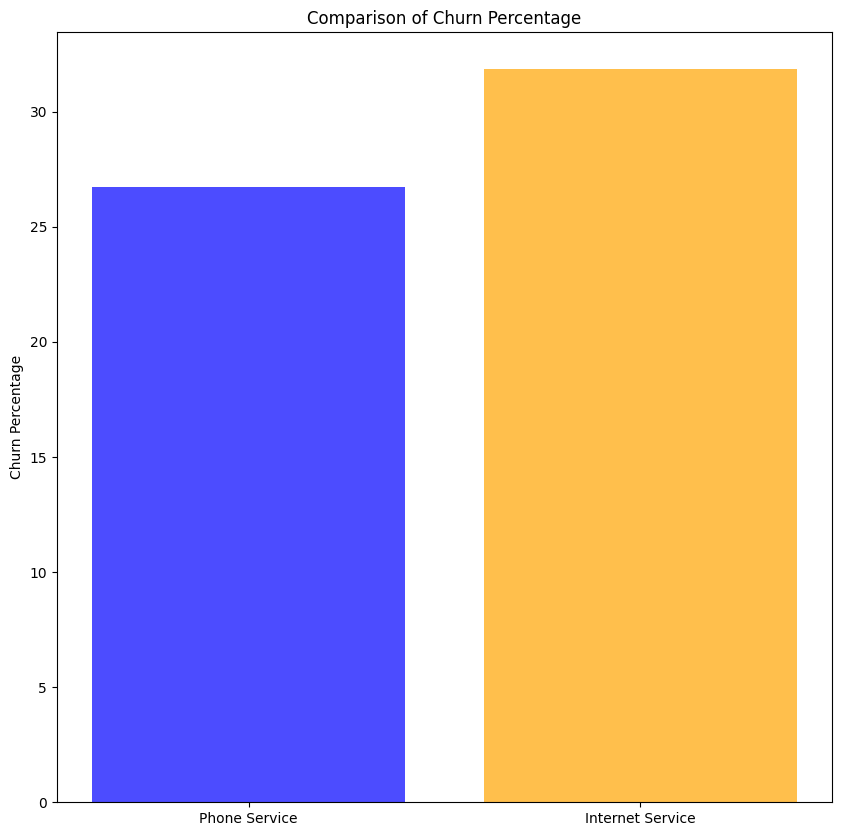

In [56]:
labels = ['Phone Service', 'Internet Service']
values = [phone_service_churn, internet_service_churn]

plt.bar(labels, values, color=['blue', 'orange'], alpha=0.7)
plt.ylabel('Churn Percentage')
plt.title('Comparison of Churn Percentage')

plt.show()

In [57]:
31.85-26.74

5.110000000000003

- ***InternetService*** users are **5.11%** more likely to churn than ***PhoneService*** users.

In [58]:
fibe_opt_churn = df[df.InternetService == 'Fiber optic'].Churn.value_counts()
DSL_churn = df[df.InternetService == 'DSL'].Churn.value_counts()
no_internet_churn = df[df.InternetService == 'No'].Churn.value_counts()

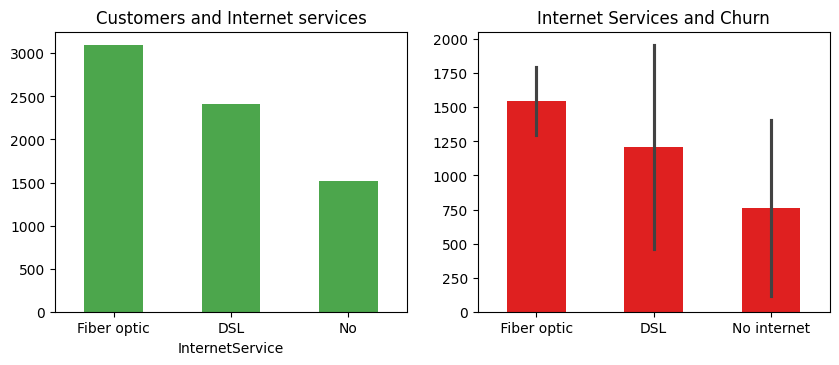

In [59]:
matplotlib.rcParams['figure.figsize'] = (10,8)

plt.subplot(2,2,1)
df.InternetService.value_counts().plot(kind='bar', color='g', alpha=0.7)
plt.title('Customers and Internet services')
plt.xticks(rotation=0)

plt.subplot(2,2,2)
sns.barplot({' Fiber optic ':fibe_opt_churn, 'DSL': DSL_churn,'No internet':no_internet_churn}, width=0.5, color='r' ) 
plt.title('Internet Services and Churn')
plt.show()

- from the plot we can see that Customers who use ***Fiber optic*** are more likely to churn 

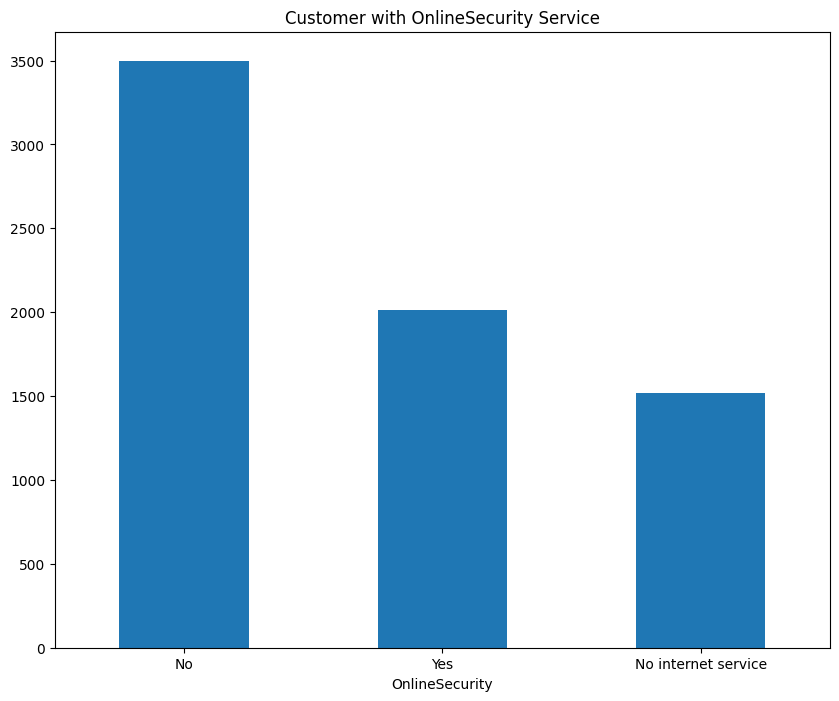

In [60]:
df.OnlineSecurity.value_counts().plot(kind='bar')
plt.title('Customer with OnlineSecurity Service')
plt.xticks(rotation=0)
plt.show()

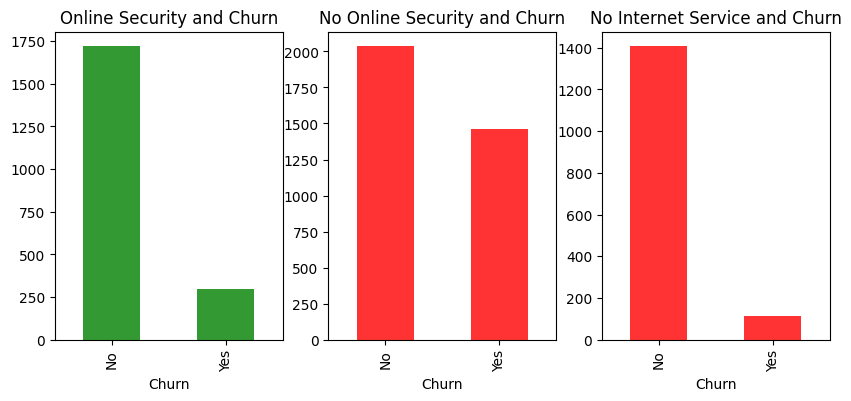

In [61]:
matplotlib.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,3,1)
df[df.OnlineSecurity == 'Yes'].Churn.value_counts().plot(kind='bar', color='g', alpha=0.8)
plt.title('Online Security and Churn')

plt.subplot(1,3,2)
df[df.OnlineSecurity == 'No'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No Online Security and Churn')

plt.subplot(1,3,3)
df[df.OnlineSecurity == 'No internet service'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No Internet Service and Churn')
plt.show()

In [62]:
len(df[(df.OnlineSecurity == 'No') & (df.Churn == 'Yes')])

1461

In [63]:
1461/3497

0.4177866742922505

- from these plots we can confirm that the **customers** with ***NO Online Security*** are most likely to churn with the chances being ***41.77%*** to churn.

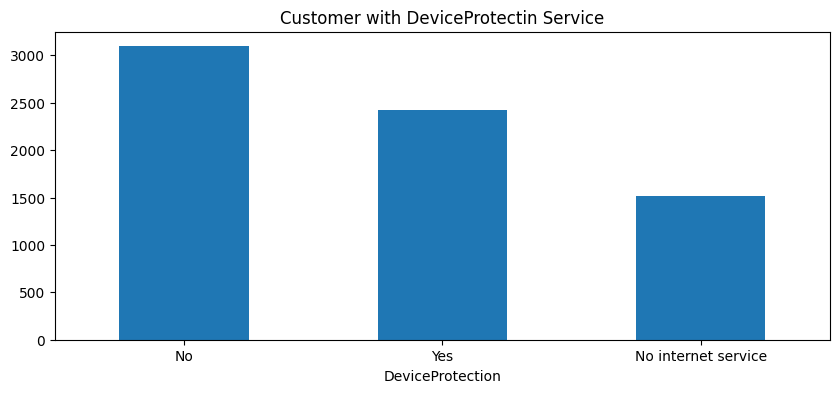

In [64]:
df.DeviceProtection.value_counts().plot(kind='bar')
plt.title('Customer with DeviceProtectin Service')
plt.xticks(rotation=0)
plt.show()

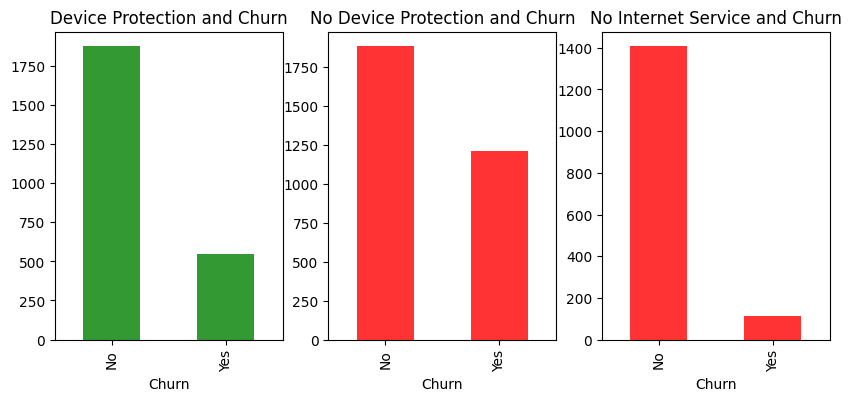

In [65]:
matplotlib.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,3,1)
df[df.DeviceProtection == 'Yes'].Churn.value_counts().plot(kind='bar', color='g', alpha=0.8)
plt.title('Device Protection and Churn')

plt.subplot(1,3,2)
df[df.DeviceProtection == 'No'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No Device Protection and Churn')

plt.subplot(1,3,3)
df[df.DeviceProtection == 'No internet service'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No Internet Service and Churn')
plt.show()

-  **Here we can see that the ***DeviceProtection*** and ***OnlineSecurity*** features are very similary correatled with the ***Churn*** feature so we would drop one of them in this case i would like to drop the ***DeviceProtection*** feature.**

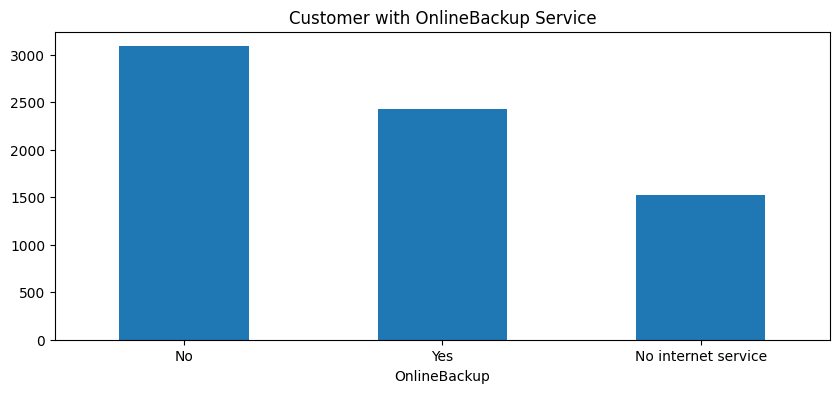

In [66]:
df.OnlineBackup.value_counts().plot(kind='bar')
plt.title('Customer with OnlineBackup Service')
plt.xticks(rotation=0)
plt.show()

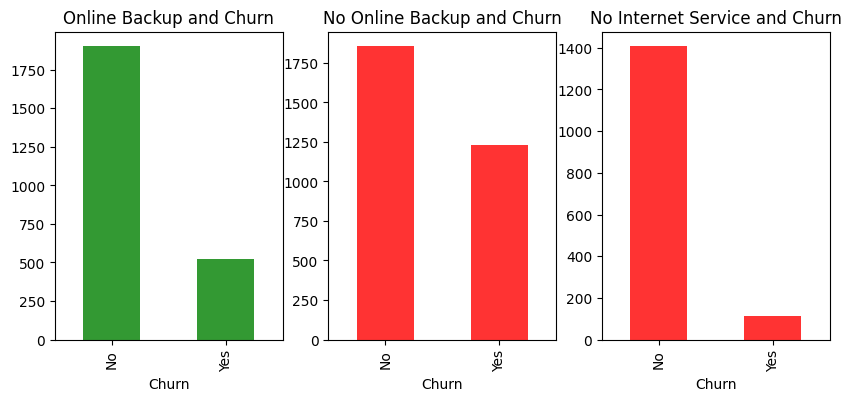

In [67]:
matplotlib.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,3,1)
df[df.OnlineBackup == 'Yes'].Churn.value_counts().plot(kind='bar', color='g', alpha=0.8)
plt.title('Online Backup and Churn')

plt.subplot(1,3,2)
df[df.OnlineBackup == 'No'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No Online Backup and Churn')

plt.subplot(1,3,3)
df[df.OnlineBackup == 'No internet service'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No Internet Service and Churn')
plt.show()

- again the plot gives very similar result.

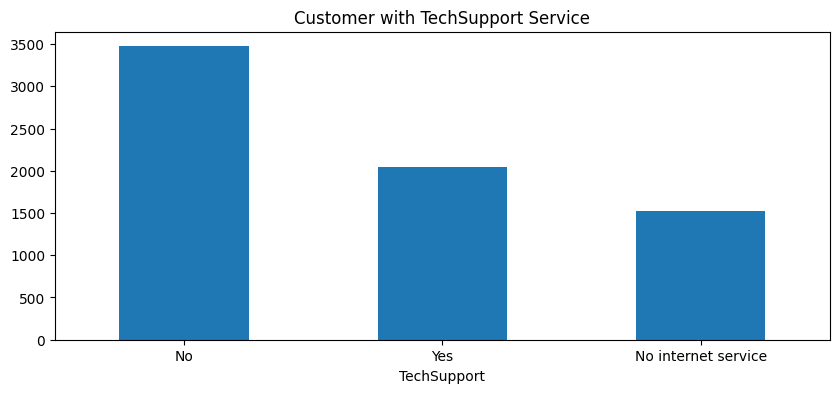

In [68]:
df.TechSupport.value_counts().plot(kind='bar')
plt.title('Customer with TechSupport Service')
plt.xticks(rotation=0)
plt.show()

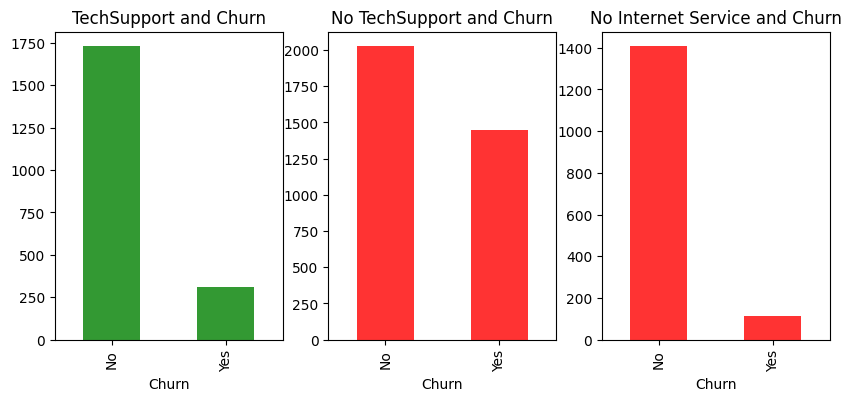

In [69]:
matplotlib.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,3,1)
df[df.TechSupport == 'Yes'].Churn.value_counts().plot(kind='bar', color='g', alpha=0.8)
plt.title('TechSupport and Churn')

plt.subplot(1,3,2)
df[df.TechSupport == 'No'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No TechSupport and Churn')

plt.subplot(1,3,3)
df[df.TechSupport == 'No internet service'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No Internet Service and Churn')
plt.show()

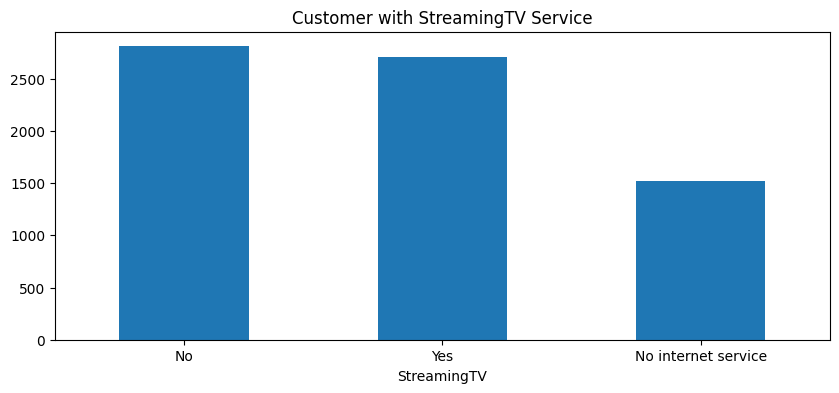

In [70]:
df.StreamingTV.value_counts().plot(kind='bar')
plt.title('Customer with StreamingTV Service')
plt.xticks(rotation=0)
plt.show()

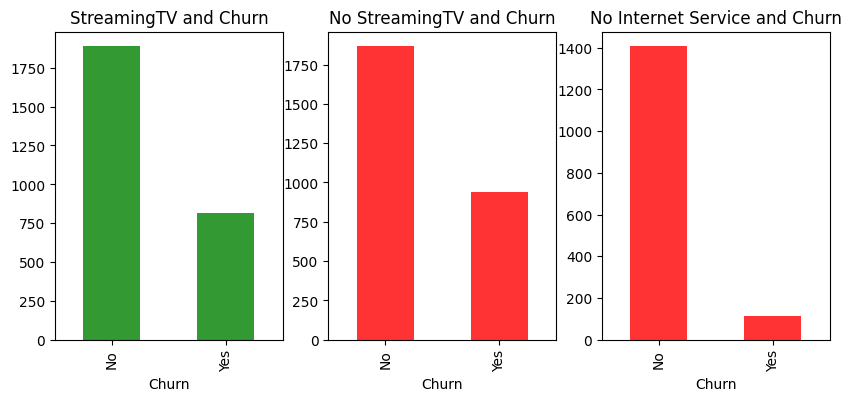

In [71]:
matplotlib.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,3,1)
df[df.StreamingTV == 'Yes'].Churn.value_counts().plot(kind='bar', color='g', alpha=0.8)
plt.title('StreamingTV and Churn')

plt.subplot(1,3,2)
df[df.StreamingTV == 'No'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No StreamingTV and Churn')

plt.subplot(1,3,3)
df[df.StreamingTV == 'No internet service'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No Internet Service and Churn')
plt.show()

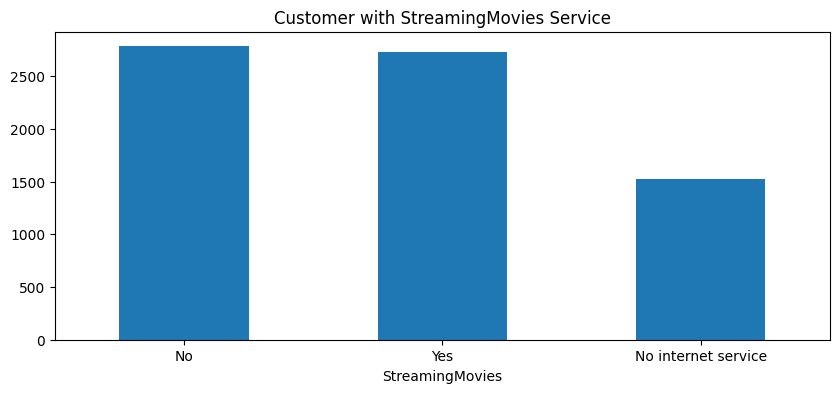

In [72]:
df.StreamingMovies.value_counts().plot(kind='bar')
plt.title('Customer with StreamingMovies Service')
plt.xticks(rotation=0)
plt.show()

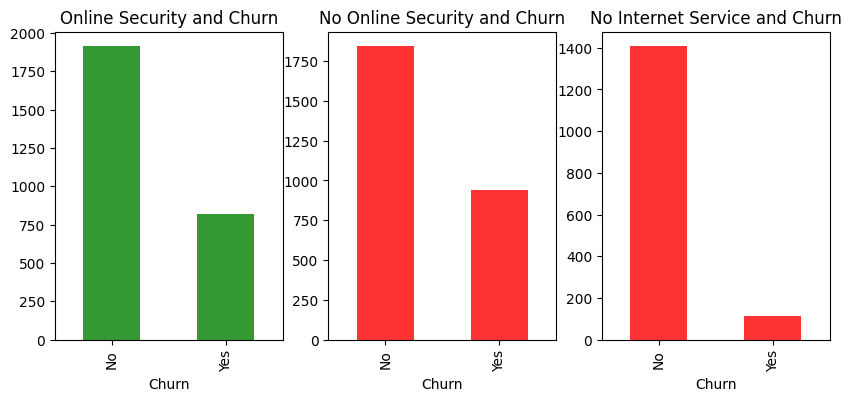

In [73]:
matplotlib.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,3,1)
df[df.StreamingMovies == 'Yes'].Churn.value_counts().plot(kind='bar', color='g', alpha=0.8)
plt.title('Online Security and Churn')

plt.subplot(1,3,2)
df[df.StreamingMovies == 'No'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No Online Security and Churn')

plt.subplot(1,3,3)
df[df.StreamingMovies == 'No internet service'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('No Internet Service and Churn')
plt.show()

- The ***StreamingTV*** and ***StreamingMovies*** features does not conclude to customer ***Churn*** because the ***Churn*** value is same for customer who has these Services and cusotmer who does not.

- for this reason we will drop these two features

In [74]:
df = df.drop(['StreamingMovies', 'StreamingTV'], axis=1)

- From the above analysis we can say that if a customer uses the ***InternetServices*** of the company, if they does not have ***OnlineSecurity, DeviceProtection, OnlineBackup & TechSupport*** services available they are more likely to churn than customers with these services.

In [75]:
df.shape

(7032, 15)

In [76]:
for column in df:
    print(f'{column}:', df[column].unique())

SeniorCitizen: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [77]:
df.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

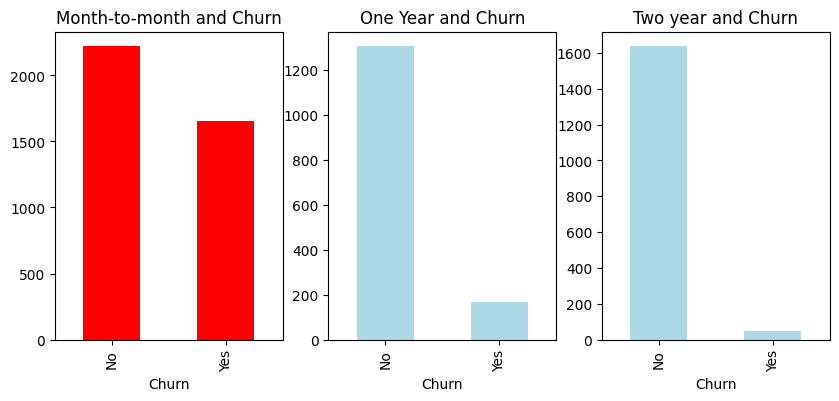

In [78]:
matplotlib.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,3,1)
df[df.Contract == 'Month-to-month'].Churn.value_counts().plot(kind='bar', color='r')
plt.title('Month-to-month and Churn')

plt.subplot(1,3,2)
df[df.Contract == 'One year'].Churn.value_counts().plot(kind='bar', color='lightblue')
plt.title('One Year and Churn')

plt.subplot(1,3,3)
df[df.Contract == 'Two year'].Churn.value_counts().plot(kind='bar', color='lightblue')
plt.title('Two year and Churn')
plt.show()

- as we can se the ***Churn*** is very high for customers who has ***Month-to-month Contract*** 

Text(0.5, 1.0, 'Non Paperless Billing and Churn')

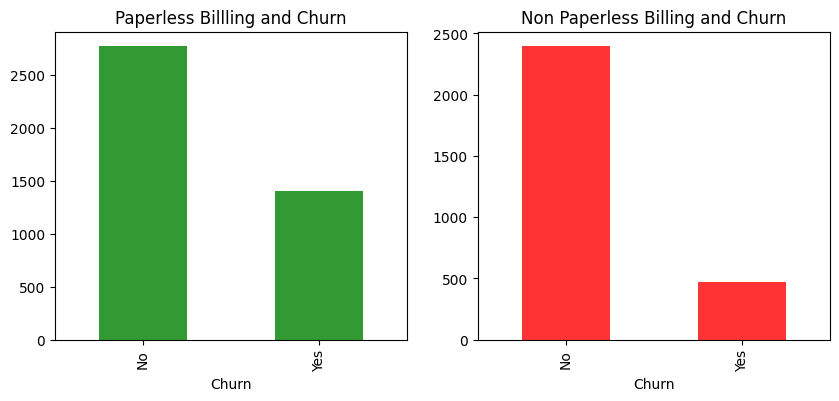

In [79]:
matplotlib.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,2,1)
df[df.PaperlessBilling == 'Yes'].Churn.value_counts().plot(kind='bar', color='g', alpha=0.8)
plt.title('Paperless Billling and Churn')

plt.subplot(1,2,2)
df[df.PaperlessBilling == 'No'].Churn.value_counts().plot(kind='bar', color='r', alpha=0.8)
plt.title('Non Paperless Billing and Churn')


- There doesn't seem to be a vailble relation between ***PaperlessBilling*** and ***Churn*** feature

In [80]:
df.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

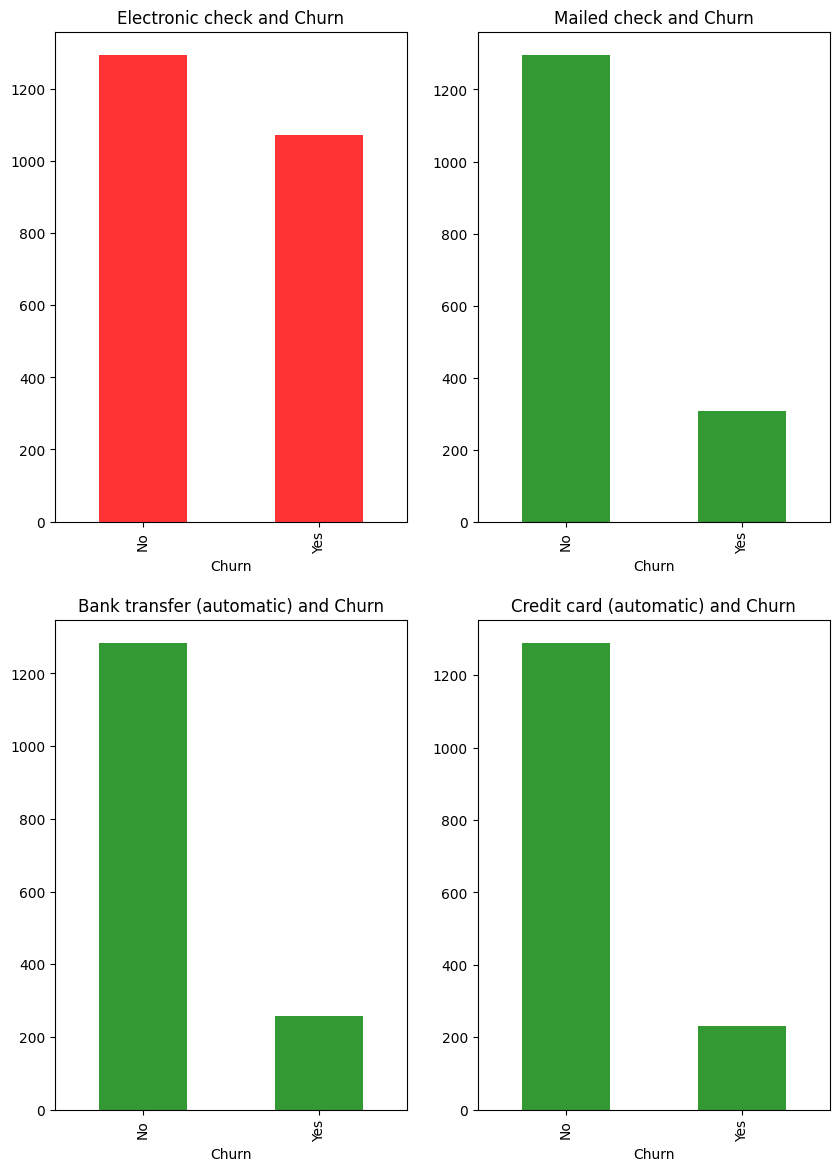

In [81]:
matplotlib.rcParams['figure.figsize'] = (10,14)
plt.subplot(2,2,1)
df[df.PaymentMethod == 'Electronic check'].Churn.value_counts().plot(kind='bar',color='r',  alpha=0.8)
plt.title('Electronic check and Churn')

plt.subplot(2,2,2)
df[df.PaymentMethod == 'Mailed check'].Churn.value_counts().plot(kind='bar',color='g',  alpha=0.8)
plt.title('Mailed check and Churn')

plt.subplot(2,2,3)
df[df.PaymentMethod == 'Bank transfer (automatic)'].Churn.value_counts().plot(kind='bar',color='g',  alpha=0.8)
plt.title('Bank transfer (automatic) and Churn')

plt.subplot(2,2,4)
df[df.PaymentMethod == 'Credit card (automatic)'].Churn.value_counts().plot(kind='bar',color='g',  alpha=0.8)
plt.title('Credit card (automatic) and Churn')
plt.show()

In [82]:
df[df.PaymentMethod == 'Electronic check'].Churn.value_counts()

Churn
No     1294
Yes    1071
Name: count, dtype: int64

In [83]:
1071/2365

0.4528541226215645

- The ***Electronic check*** method of Payment contribute to most amout of customer Churn comparison to other payment methods

# Conclusions after categorical columns analysis

- ***InternetService*** users are **5.11%** more likely to churn than ***PhoneService*** users.
- Customers with ***Month-to-month Contract*** tends to churn more than customers with other ***Contracts.***
- From the above analysis we can say that if a customer uses the ***InternetServices*** of the company, if they does not have ***OnlineSecurity, DeviceProtection, OnlineBackup & TechSupport*** services available they are more likely to churn than customers with these services.
- For ***PaymentMethod*** customer who use ***Electronic check*** method has a **45.24%** chance to churn than other customers.

# Feature Engineering

In [84]:
df

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,34,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,0,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,Yes,Yes,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,11,No,No phone service,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,4,Yes,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [85]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [86]:
for cols in df.columns:
    print(f'{cols}: ',df[cols].unique())

SeniorCitizen:  [0 1]
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No phone service' 'No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes' 'No internet service']
OnlineBackup:  ['Yes' 'No' 'No internet service']
DeviceProtection:  ['No' 'Yes' 'No internet service']
TechSupport:  ['No' 'Yes' 'No internet service']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:  ['No' 'Yes']


In [87]:
yes_no_encode_cols = ['PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Churn']

In [88]:
for col in yes_no_encode_cols:
    df[col].replace({'Yes': 1,'No': 0, 'No internet service':3},inplace=True)

C:\Users\gouta\AppData\Local\Temp\ipykernel_14136\2185693956.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes': 1,'No': 0, 'No internet service':3},inplace=True)
C:\Users\gouta\AppData\Local\Temp\ipykernel_14136\2185693956.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

In [89]:
df.MultipleLines.replace({'Yes': 1,'No': 0, 'No phone service':4},inplace=True)

C:\Users\gouta\AppData\Local\Temp\ipykernel_14136\4219905481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.MultipleLines.replace({'Yes': 1,'No': 0, 'No phone service':4},inplace=True)
C:\Users\gouta\AppData\Local\Temp\ipykernel_14136\4219905481.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [90]:
df.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,4,DSL,0,1,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,34,1,0,DSL,1,0,1,0,One year,0,Mailed check,56.95,1889.50,0
2,0,2,1,0,DSL,1,1,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,45,0,4,DSL,1,0,1,1,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,2,1,0,Fiber optic,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [91]:
df.tail()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,0,24,1,1,DSL,1,0,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,72,1,1,Fiber optic,0,1,1,0,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,11,0,4,DSL,1,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,4,1,1,Fiber optic,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1
7042,0,66,1,0,Fiber optic,1,0,1,1,Two year,1,Bank transfer (automatic),105.65,6844.50,0


In [92]:
df.dtypes

SeniorCitizen         int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

- We will do **one hot encoding** for the other categorical columns.

In [92]:
df = pd.get_dummies(data=df, columns=['InternetService','PaymentMethod', 'Contract'], dtype='int64')

In [93]:
df.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,4,0,1,0,0,1,29.85,...,1,0,0,0,0,1,0,1,0,0
1,0,34,1,0,1,0,1,0,0,56.95,...,1,0,0,0,0,0,1,0,1,0
2,0,2,1,0,1,1,0,0,1,53.85,...,1,0,0,0,0,0,1,1,0,0
3,0,45,0,4,1,0,1,1,0,42.30,...,1,0,0,1,0,0,0,0,1,0
4,0,2,1,0,0,0,0,0,1,70.70,...,0,1,0,0,0,1,0,1,0,0


In [94]:
df.dtypes

SeniorCitizen                                int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
PaymentMethod_Bank transfer (automatic)      int64
PaymentMethod_Credit card (automatic)        int64
PaymentMethod_Electronic check               int64
PaymentMethod_Mailed check                   int64
Contract_Month-to-month        

- saving the data for further usecase 

In [96]:
df.to_csv('churndata_encoded.csv', index=False)

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [97]:
numerical_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [98]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [99]:
df.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0.0,0.000000,0,4,0,1,0,0,1,0.115423,...,True,False,False,False,False,True,False,True,False,False
1,0.0,0.464789,1,0,1,0,1,0,0,0.385075,...,True,False,False,False,False,False,True,False,True,False
2,0.0,0.014085,1,0,1,1,0,0,1,0.354229,...,True,False,False,False,False,False,True,True,False,False
3,0.0,0.619718,0,4,1,0,1,1,0,0.239303,...,True,False,False,True,False,False,False,False,True,False
4,0.0,0.014085,1,0,0,0,0,0,1,0.521891,...,False,True,False,False,False,True,False,True,False,False


In [100]:
df.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

# Train Test Split

In [101]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [103]:
X_train.shape

(5625, 21)

In [104]:
y_train.shape

(5625,)

In [105]:
X_test.shape

(1407, 21)

# Building a Machine Learning model

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gd_boost = GradientBoostingClassifier()

In [107]:
gd_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [108]:
y_pred = gd_boost.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [110]:
accuracy

0.7882018479033405

In [111]:
conf_matrix

array([[927, 106],
       [192, 182]], dtype=int64)

- performing hyperparameter tuning for this model

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],     # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4, 5],             # Maximum depth of the individual trees
    'min_samples_split': [2, 3, 4],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],      # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0],       # Fraction of samples used for fitting the individual base learners

}
    
grid_search_gd_boost = GridSearchCV(gd_boost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gd_boost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [113]:
 grid_search_gd_boost.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 50,
 'subsample': 0.8}

In [114]:
y_pred = grid_search_gd_boost.predict(X_test)

In [115]:
accuracy_score(y_test, y_pred)

0.7931769722814499

In [121]:
from  sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search_dt = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [122]:
dt_pred = grid_search_dt.predict(X_test)

In [123]:
accuracy_score(y_test, dt_pred)

0.7739872068230277

In [117]:
model = grid_search_gd_boost

In [118]:
y_pred = model.predict(X_test)

In [119]:
confusion_matrix(y_test, y_pred)

array([[928, 105],
       [186, 188]], dtype=int64)

In [120]:
accuracy_score(y_test, y_pred)

0.7931769722814499

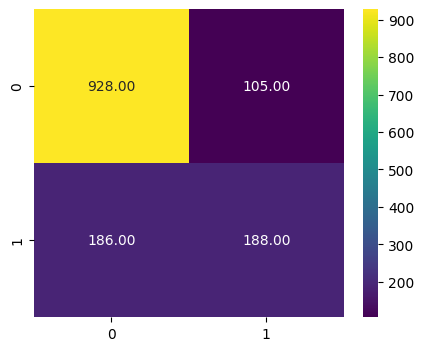

In [133]:
matplotlib.rcParams['figure.figsize'] = (5,4)
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt='.2f', cmap='viridis')
plt.show()

- as you can see the model has a accuracy of **79.31%** only even after hyperparamter tuning. 

- **We will try to build a model again with up sampling the dataset.**

# Upsampling to balance the dataset

In [104]:
df = df.drop('SeniorCitizen', axis=1)

In [97]:
df_majority = df[df.Churn == 0]
df_minority = df[df.Churn == 1]

In [99]:
df_majority.shape
df_minority.shape

(1869, 22)

In [100]:
from sklearn.utils import resample

df_minority_resample = resample(df_minority,
                                replace=True,
                                n_samples=5163,
                                random_state=42)

In [101]:
df_minority_resample.shape

(5163, 22)

In [102]:
df_upsampled = pd.concat([df_majority, df_minority_resample])

In [103]:
df_upsampled.Churn.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [ ]:
df_upsampled.to_csv('upsampled_churn_data.csv', index=False)

- To check the model building go to ***Customer_churn_model*** notebook.